In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_custom_weighted_graph(node_list, edge_weight_list):
    """
    Draw a custom weighted graph with two different styles for edges based on their weights.
    
    Parameters:
    node_list (list): A list of nodes in the graph.
    edge_weight_list (list of tuples): A list of edges with weights, where each edge is represented as (node1, node2, weight).
    """

    # Create the graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(node_list)

    # Add edges with weights
    for (u, v, w) in edge_weight_list:
        G.add_edge(u, v, weight=w)

    # Separate the edges into large and small weight groups
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    # Get positions for all nodes - using a fixed seed for reproducibility
    pos = nx.circular_layout(G, scale=3)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # Draw the edges with weights > 0.5
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)

    # Draw the edges with weights <= 0.5 in blue, dashed style
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    )

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    # Draw edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

    # Set margins and display options
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()



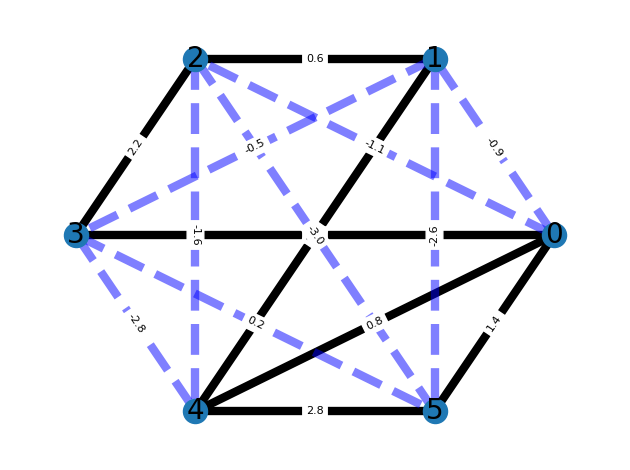

In [4]:
from itertools import permutations
import random
num_nodes = 6
nodes_list = [x for x in range(num_nodes)]
edges = list(permutations(nodes_list, 2))
edges_w = [(*x, round(random.uniform(-3,3),1)) for x in edges]
draw_custom_weighted_graph(nodes_list, edges_w)

In [5]:
def generate_dict_cost(nodes_list, edges_w):
    nodes_weights = {node:{} for node in nodes_list}
    for edge in edges_w:
        nodes_weights[edge[0]][edge[1]] = edge[2]
        nodes_weights[edge[1]][edge[0]] = edge[2]
    return nodes_weights

In [6]:
nodes_weights = generate_dict_cost(nodes_list, edges_w)

In [7]:
import pandas as pd
pd.DataFrame(nodes_weights).sort_index()

,0,1,2,3,4,5
0,NaN,-0.9,-1.1,2.8,0.8,1.4
1,-0.9,NaN,0.6,-0.5,2.4,-2.6
2,-1.1,0.6,NaN,2.2,-1.6,-3.0
3,2.8,-0.5,2.2,NaN,-2.8,0.2
4,0.8,2.4,-1.6,-2.8,NaN,2.8
5,1.4,-2.6,-3.0,0.2,2.8,NaN


In [ ]:
-1.2-0.4+1.3+1.5

In [ ]:
cost_list

In [ ]:
seed_dnas

In [8]:
def generate_sequential_pairs(dna):
    if len(dna) < 2:
        return []
    
    return [(dna[i], dna[i+1]) for i in range(len(dna) - 1)]
    
def evaluate_cost_dna(nodes_weights, dna):
    paths = generate_sequential_pairs(dna)
    
    cost = sum(list(map(lambda pair: nodes_weights[pair[0]][pair[1]], paths)))
    del paths
    return cost

In [9]:
import random
def get_random_dnas(nodes_list, n=100):
    stacks=[]
    for x in range(n):
        dna = []
        for _ in range(len(nodes_list)):
            dna.append(random.choice(list(set(nodes_list)-set(dna))))
        stacks.append(dna)
    return stacks

In [10]:

seed_dnas = get_random_dnas(nodes_list,4)

In [11]:
seed_dnas

[[0, 4, 1, 5, 2, 3],
 [2, 0, 5, 3, 4, 1],
 [5, 1, 3, 0, 4, 2],
 [1, 4, 0, 2, 5, 3]]

In [12]:
cost_list = list(map(lambda dna: evaluate_cost_dna(nodes_weights, dna),seed_dnas))

In [13]:
evaluate_cost_dna(nodes_weights, [0,1,2,3,4])

-0.8999999999999997